In [2]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img_array = cv2.imread("Training/0/Training_64612167.jpg")

In [4]:
img_array.shape # rgb

(48, 48, 3)

In [5]:
print(img_array)

[[[49 49 49]
  [59 59 59]
  [66 66 66]
  ...
  [67 67 67]
  [61 61 61]
  [59 59 59]]

 [[62 62 62]
  [55 55 55]
  [64 64 64]
  ...
  [65 65 65]
  [57 57 57]
  [58 58 58]]

 [[62 62 62]
  [62 62 62]
  [65 65 65]
  ...
  [62 62 62]
  [55 55 55]
  [58 58 58]]

 ...

 [[11 11 11]
  [15 15 15]
  [17 17 17]
  ...
  [42 42 42]
  [41 41 41]
  [46 46 46]]

 [[17 17 17]
  [13 13 13]
  [14 14 14]
  ...
  [45 45 45]
  [46 46 46]
  [51 51 51]]

 [[27 27 27]
  [14 14 14]
  [12 12 12]
  ...
  [47 47 47]
  [55 55 55]
  [60 60 60]]]


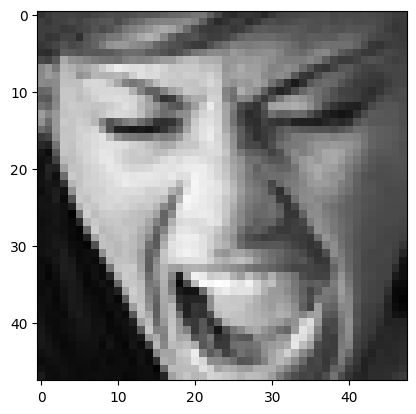

In [6]:
plt.imshow(img_array)

In [7]:
Datadirectory = "Training/" ##Training dataset

In [8]:
Classes = ["0", "1", "2", "3", "4", "5", "6"]

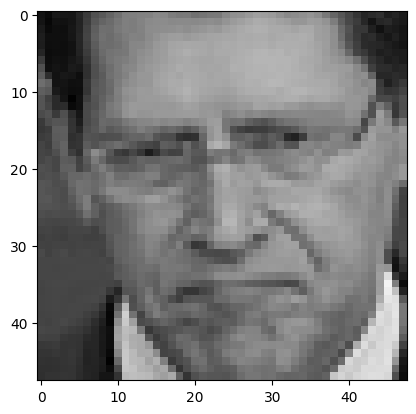

In [9]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

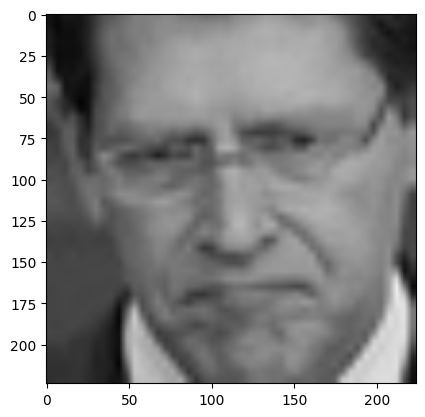

In [10]:
img_size = 224 ## ImageNet => 224 * 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
new_array.shape

(224, 224, 3)

# read all the image and convert them into array

In [12]:
training_Data = [] ## data array
def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category) ## 0 1, ## Label
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass

In [13]:
create_training_Data()

In [14]:
print(len(training_Data))

12741


In [15]:
import random
random.shuffle(training_Data)

In [16]:
X = [] ## data /feature
y = [] ## label 0 1 2 ...
for features, label in training_Data:
    X.append(features) ## contain img
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3) ## convert to 4 dimension

In [17]:
X.shape

(12741, 224, 224, 3)

In [18]:
# normalize the data
X = X/255.0 # divide by maximum

In [ ]:
type(y)

list

In [ ]:
Y = np.array(y)

In [ ]:
Y.shape

(12741,)

# deep learning model for training - tranfer learning

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = tf.keras.applications.MobileNetV2() ## pre-trained model

In [ ]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

# Tranfer Learing - Tuning, weights will start from last checkpoint

In [ ]:
base_input = model.layers[0].input

In [ ]:
base_output = model.layers[-2].output

In [ ]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [ ]:
final_output = layers.Dense(128)(base_output) ## adding new layer, after the output of gobal pooling layer
final_output = layers.Activation("relu")(final_output) ## activation function
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation("relu")(final_output)
final_output = layers.Dense(7, activation="softmax")(final_output) # classes are 7, classification layer

In [ ]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [ ]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [ ]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [ ]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
new_model.fit(X, Y, epochs=15)

In [ ]:
new_model.save("my_model_64p35.h5")

In [23]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
new_model = tf.keras.models.load_model("my_model_64p35.h4")

In [24]:
frame = cv2.imread("Suprisedman.jpg")

In [25]:
frame.shape

(360, 540, 3)

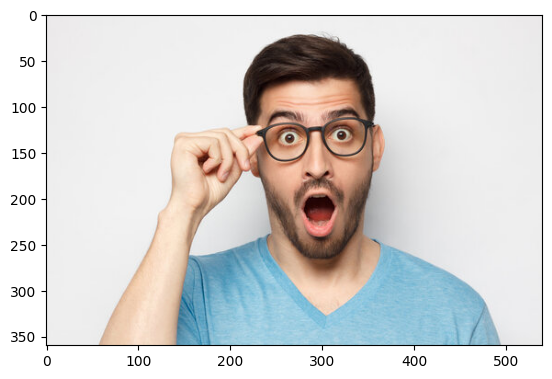

In [26]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [27]:
faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

In [28]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [29]:
gray.shape

(360, 540)

In [30]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for x, y, w, h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex+ew]

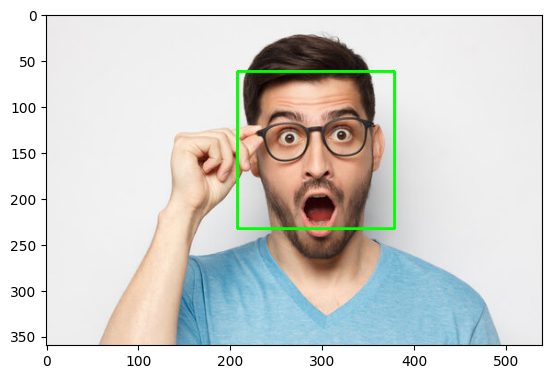

In [31]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

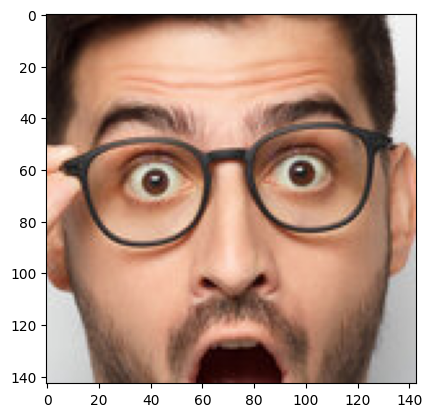

In [32]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [33]:
final_image = cv2.resize(face_roi, (224, 224))
final_image = np.expand_dims(final_image, axis=0) ## 4 dimension
final_image = final_image/255.0 ## normalizing

In [34]:
Predictions = new_model.predict(final_image)

1/1 [==============================] - 1s 701ms/step


In [35]:
Predictions[0]

array([6.8731862e-01, 7.4552954e-05, 2.9971467e-02, 4.2182501e-04,
       1.0022061e-02, 3.9556713e-04, 2.7179584e-01], dtype=float32)

In [36]:
np.argmax(Predictions)

0

# Realtime Video Demo

In [42]:
import cv2
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

# set the rectangle background to white
rectangle_bgr = (255, 255, 255)
#make a black image
img = np.zeros((500, 500))
# set some text
text = "Some text in a box!"
# get the width and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
# set the text start position
text_offset_x = 10
text_offset_y = img.shape[0] -25
# make the coords of the box with a small padding of two pixels
box_coords = ((text_offset_x, text_offset_y), (text_offset_y + text_width + 2, text_offset_y + text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)

cap = cv2.VideoCapture(-1)
# check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print(faceCascade.emty())
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    for x, y, w, h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for (ex, ey, ew, eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex+ew] ## cropping the face

    final_image = cv2.resize(face_roi, (224, 224))
    final_image = np.expand_dims(final_image, axis=0) ## 4 dimension
    final_image = final_image/255.0 ## normalizing

    font = cv2.FONT_HERSHEY_COMPLEX

    Predictions = new_model.predict(final_image)

    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN


    if (np.argmax(Predictions)==0):
        status = "Angry"

        x1, y1, w1, h1 = 0, 0, 175, 75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+ w1, y1 + h1), (0,0,0), -1)
        # Add text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
    elif (np.argmax (Predictions)==1):
        status = "Disgust"
        x1,y1,w1,h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+ w1, y1 + h1), (0,0,0), -1)
        # Add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
    elif (np.argmax (Predictions)==2):
        status = "Fear"
        x1,y1,w1,h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+ w1, y1 + h1), (0,0,0), -1)
        # Add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
    elif (np.argmax (Predictions)==3):
        status = "Happy"
        x1,y1,w1,h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+ w1, y1 + h1), (0,0,0), -1)
        # Add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
    elif (np.argmax (Predictions)==4):
        status = "Neutral"
        x1,y1,w1,h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+ w1, y1 + h1), (0,0,0), -1)
        # Add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
    elif (np.argmax (Predictions)==5):
        status = "Sad"
        x1,y1,w1,h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+ w1, y1 + h1), (0,0,0), -1)
        # Add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
    else:
        status = "Suprise"
        x1,y1,w1,h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+ w1, y1 + h1), (0,0,0), -1)
        # Add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))

    ## use putText() method for inserting text on video
    cv2.imshow("Face Emotion Recognition", frame)

    if cv2.waitKey(2) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 41ms/step
Face not detected
1/1 [==============================] - 0s 41ms/step
Face not detected
1/1 [==============================] - 0s 40ms/step
Face not detected
1/1 [==============================] - 0s 41ms/step
Face not detected
1/1 [==============================] - 0s 40ms/step
Face not detected
1/1 [==============================] - 0s 41ms/step
Face not detected
1/1 [==============================] - 0s 40ms/step
Face not detected
1/1 [==============================] - 0s 41ms/step
Face not detected
1/1 [==============================] - 0s 42ms/step
Face not detected
1/1 [==============================] - 0s 40ms/step
Face not detected
1/1 [==============================] - 0s 41ms/step
Face not detected
1/1 [==============================] - 0s 40ms/step
Face not detected
1/1 [==============================] - 0s 41ms/step
Face not detected
1/1 [==============================] - 0s 42ms/step
Face not detected
1/1 [===============

KeyboardInterrupt: 